
# Animation of the gradient descent technique
The purpose of the notbook is to show the behaviour of the gradient descent technique on non-concave error surfaces.

As an example, we take a surface defined as a difference bewteen two multivariate gaussians.

In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [3]:
#gradient of a bivariate gaussian N(mu,simga)
def gradient(x,mu,sigma):
  mvx = multivariate_normal(mu, sigma).pdf(x)
  g = mvx * (np.dot(np.linalg.inv(sigma),(x - mu)))
  return g

In [4]:
#the function we consider is the difference of two bivariate gaussian
mu1 = np.array([0,0])
sigma1 = np.array([[1, .5], [.5, 1]])
mu2 = np.array([1,1])
sigma2 = np.array([[1.5, 0], [0, .5]])
z1 = multivariate_normal(mu1, sigma1)
z2 = multivariate_normal(mu2, sigma2)

#f1 is its derivative
def f(pos): return 10*(z2.pdf(pos)-z1.pdf(pos))
def f1(pos): return gradient(pos,mu2,sigma2)-gradient(pos,mu1,sigma1)

Text(0.5, 1.0, 'Gradient Descent')

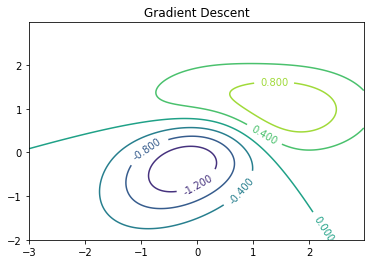

In [23]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

x, y = np.mgrid[-3:3:.025, -2:3:.025]
grid = np.empty(x.shape + (2,))
grid[:, :, 0] = x; grid[:, :, 1] = y

step = 1 #length of the step is the direction of the gradient (lr)

fig = plt.figure()
CS = plt.contour(x, y, f(grid))
plt.clabel(CS, inline=1, fontsize=10)
line, = plt.plot([], [], lw=2)
plt.title('Gradient Descent')

Start point

In [31]:
#xdata, ydata = [.8], [1.31]
#xdata, ydata = [.8], [1.41]
xdata, ydata = [-1.2], [1.0]
#xdata, ydata = [-2.0], [1.0]

In [32]:
def init():
    line.set_data([], [])
    return line,

def animate(i):
  pos = np.array([xdata[-1],ydata[-1]])
  delta = step*f1(pos)
  npos = pos + delta
  xdata.append(npos[0])
  ydata.append(npos[1])
  #print xdata
  #print ydata
  line.set_data(xdata, ydata)
  return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=60, interval=1000, blit=True, repeat=False)
anim